# PREDICTION OF SEPSIS IN ICU PATIENTS
The CRISP-DM (Cross Industry Standard Process for Data Mining) framework is a robust methodology for carrying out data mining projects. It is comprised of six major phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. 


# 1. Business Understanding

## Objective:
To predict whether a patient in the ICU will develop sepsis based on various medical attributes. Sepsis is a serious medical condition, and early prediction can significantly improve patient outcomes by enabling timely intervention and treatment.

## Business Goals:
1. **Improve Patient Outcomes**: By predicting the likelihood of sepsis, medical staff can take preventive measures to treat patients more effectively and reduce mortality rates.
2. **Optimize Resource Allocation**: Early prediction of sepsis can help in better allocation of medical resources, ensuring that high-risk patients receive immediate attention.
3. **Cost Reduction**: Preventing sepsis can significantly reduce healthcare costs associated with prolonged ICU stays, complex treatments, and post-sepsis complications.

## Key Questions:
1. What are the primary medical attributes that contribute to the development of sepsis?
2. How accurately can we predict sepsis in ICU patients using the given dataset?
3. What is the impact of missing values on the prediction model, and how can they be handled?

## Success Criteria:
1. **Model Accuracy**: The predictive model should achieve a high accuracy, sensitivity, and specificity in predicting sepsis.
2. **Timely Predictions**: Predictions should be made early enough to allow for effective intervention.
3. **Practical Implementation**: The model should be easy to integrate into existing hospital systems and workflows.



# 2. Data Understanding

## Initial Data Collection:
The dataset consists of several attributes related to patient health metrics and demographics. Each patient has a unique ID, and the target variable is whether the patient develops sepsis (Sepsis).

## Data Description:
To determine which of these factors cannot help identify if a patient will develop sepsis, it's essential to understand what sepsis is and what factors commonly contribute to its diagnosis. Sepsis is a life-threatening condition that arises when the body's response to an infection causes injury to its own tissues and organs. Factors that typically help identify the risk of developing sepsis include vital signs (such as blood pressure and heart rate), laboratory results indicating infection or organ dysfunction, and patient demographics or medical history.

Here's a brief analysis of each factor listed:

- **ID:** Unique identifier for each patient (administrative use, not clinical).
- **PRG:** Plasma glucose levels (can be related to metabolic stress but not directly indicative of sepsis).
- **PL:** Blood Work Result-1 (without specific details, it's unclear if this is relevant).
- **PR:** Blood Pressure (critical for identifying septic shock, a severe sepsis condition).
- **SK:** Blood Work Result-2 (without specific details, it's unclear if this is relevant).
- **TS:** Blood Work Result-3 (without specific details, it's unclear if this is relevant).
- **M11:** Body mass index (BMI) (can indicate general health but not directly indicative of sepsis).
- **BD2:** Blood Work Result-4 (without specific details, it's unclear if this is relevant).
- **Age:** Age of the patient (older age can be a risk factor for sepsis).
- **Insurance:** Indicator if the patient holds a valid insurance card (administrative use, not clinical).

From this list, the factors that cannot help identify if a patient will develop sepsis or not are primarily administrative or not directly related to clinical indicators of infection and organ dysfunction:

- **ID**: Unique identifier for each patient.
- **Insurance**: Indicator if the patient holds a valid insurance card.
- **M11**: Body mass index (BMI).

While BMI and age can influence overall health, they are not direct indicators for the diagnosis of sepsis. The unique identifier (ID) and insurance status are entirely administrative and do not contribute to clinical decision-making regarding sepsis.

## Data Quality:
- **Missing Values**: Yes, there are missing attribute values. These need to be identified and handled appropriately during the data preparation phase.

### Next Steps:
1. **Data Preparation**:
   - Handle missing values through imputation or removal.
   - Normalize or standardize the data if necessary.
   - Encode categorical variables (if any).

2. **Exploratory Data Analysis (EDA)**:
   - **Data Visualization**:
     - Plot histograms and density plots for numerical attributes to understand their distributions.
     - Create box plots to identify outliers and understand the spread of the data.
     - Use bar charts for categorical attributes (e.g., Insurance).
   - **Correlation Analysis**:
     - Compute the correlation matrix to identify relationships between numerical attributes.
     - Use heatmaps to visualize the correlations.
   - **Target Variable Analysis**:
     - Analyze the distribution of the target variable (Sepsis).
     - Compare the distributions of numerical attributes for different target variable classes (e.g., Positive vs. Negative).
   - **Missing Data Analysis**:
     - Identify the percentage of missing values in each attribute.
     - Visualize missing data patterns using heatmaps or bar plots.
   - **Feature Engineering**:
     - Create new features if necessary, based on domain knowledge or patterns identified during EDA.
     - Consider interactions between features that might improve model performance.

3. **Modeling**:
   - **Feature Engineering**:
     - Create new features if necessary, based on domain knowledge or patterns identified during EDA.
     - Consider interactions between features that might improve model performance.
   - Select appropriate predictive modeling techniques (e.g., logistic regression, decision trees, random forest, etc.).
   - Train and test models using cross-validation.

4. **Evaluation**:
   - Assess model performance using metrics like accuracy, sensitivity, specificity, precision, and recall.
   - Compare different models to select the best-performing one.

5. **Deployment**:
   - Integrate the predictive model into the API.
   - Monitor the model's performance over time and update it as necessary.



### Import necessary libraries and packages

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Machine learning
# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Additional utilities
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style="whitegrid")
%matplotlib inline


## Exploratory Data Analysis

In [2]:
train_df= pd.read_csv("../datasets/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [5]:
train_df.shape

(599, 11)

In [6]:
train_df.isna().sum().sum()

np.int64(0)

### Hypotheses Testing

In [7]:

# Prepare the data: create a contingency table
contingency_table = pd.crosstab(train_df['Insurance'], train_df['Sepssis'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
expected




Chi-square statistic: 2.0712782081677066
P-value: 0.1500956791860619
Degrees of freedom: 1
Expected frequencies:


array([[122.71786311,  65.28213689],
       [268.28213689, 142.71786311]])

In [8]:
# Interpret the p-value
alpha = 0.01  # Significance level
if p < alpha:
    print("Reject the null hypothesis. There is an association between having insurance and the occurrence of sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no association between having insurance and the occurrence of sepsis.")

Fail to reject the null hypothesis. There is no association between having insurance and the occurrence of sepsis.


### Univariate Analysis

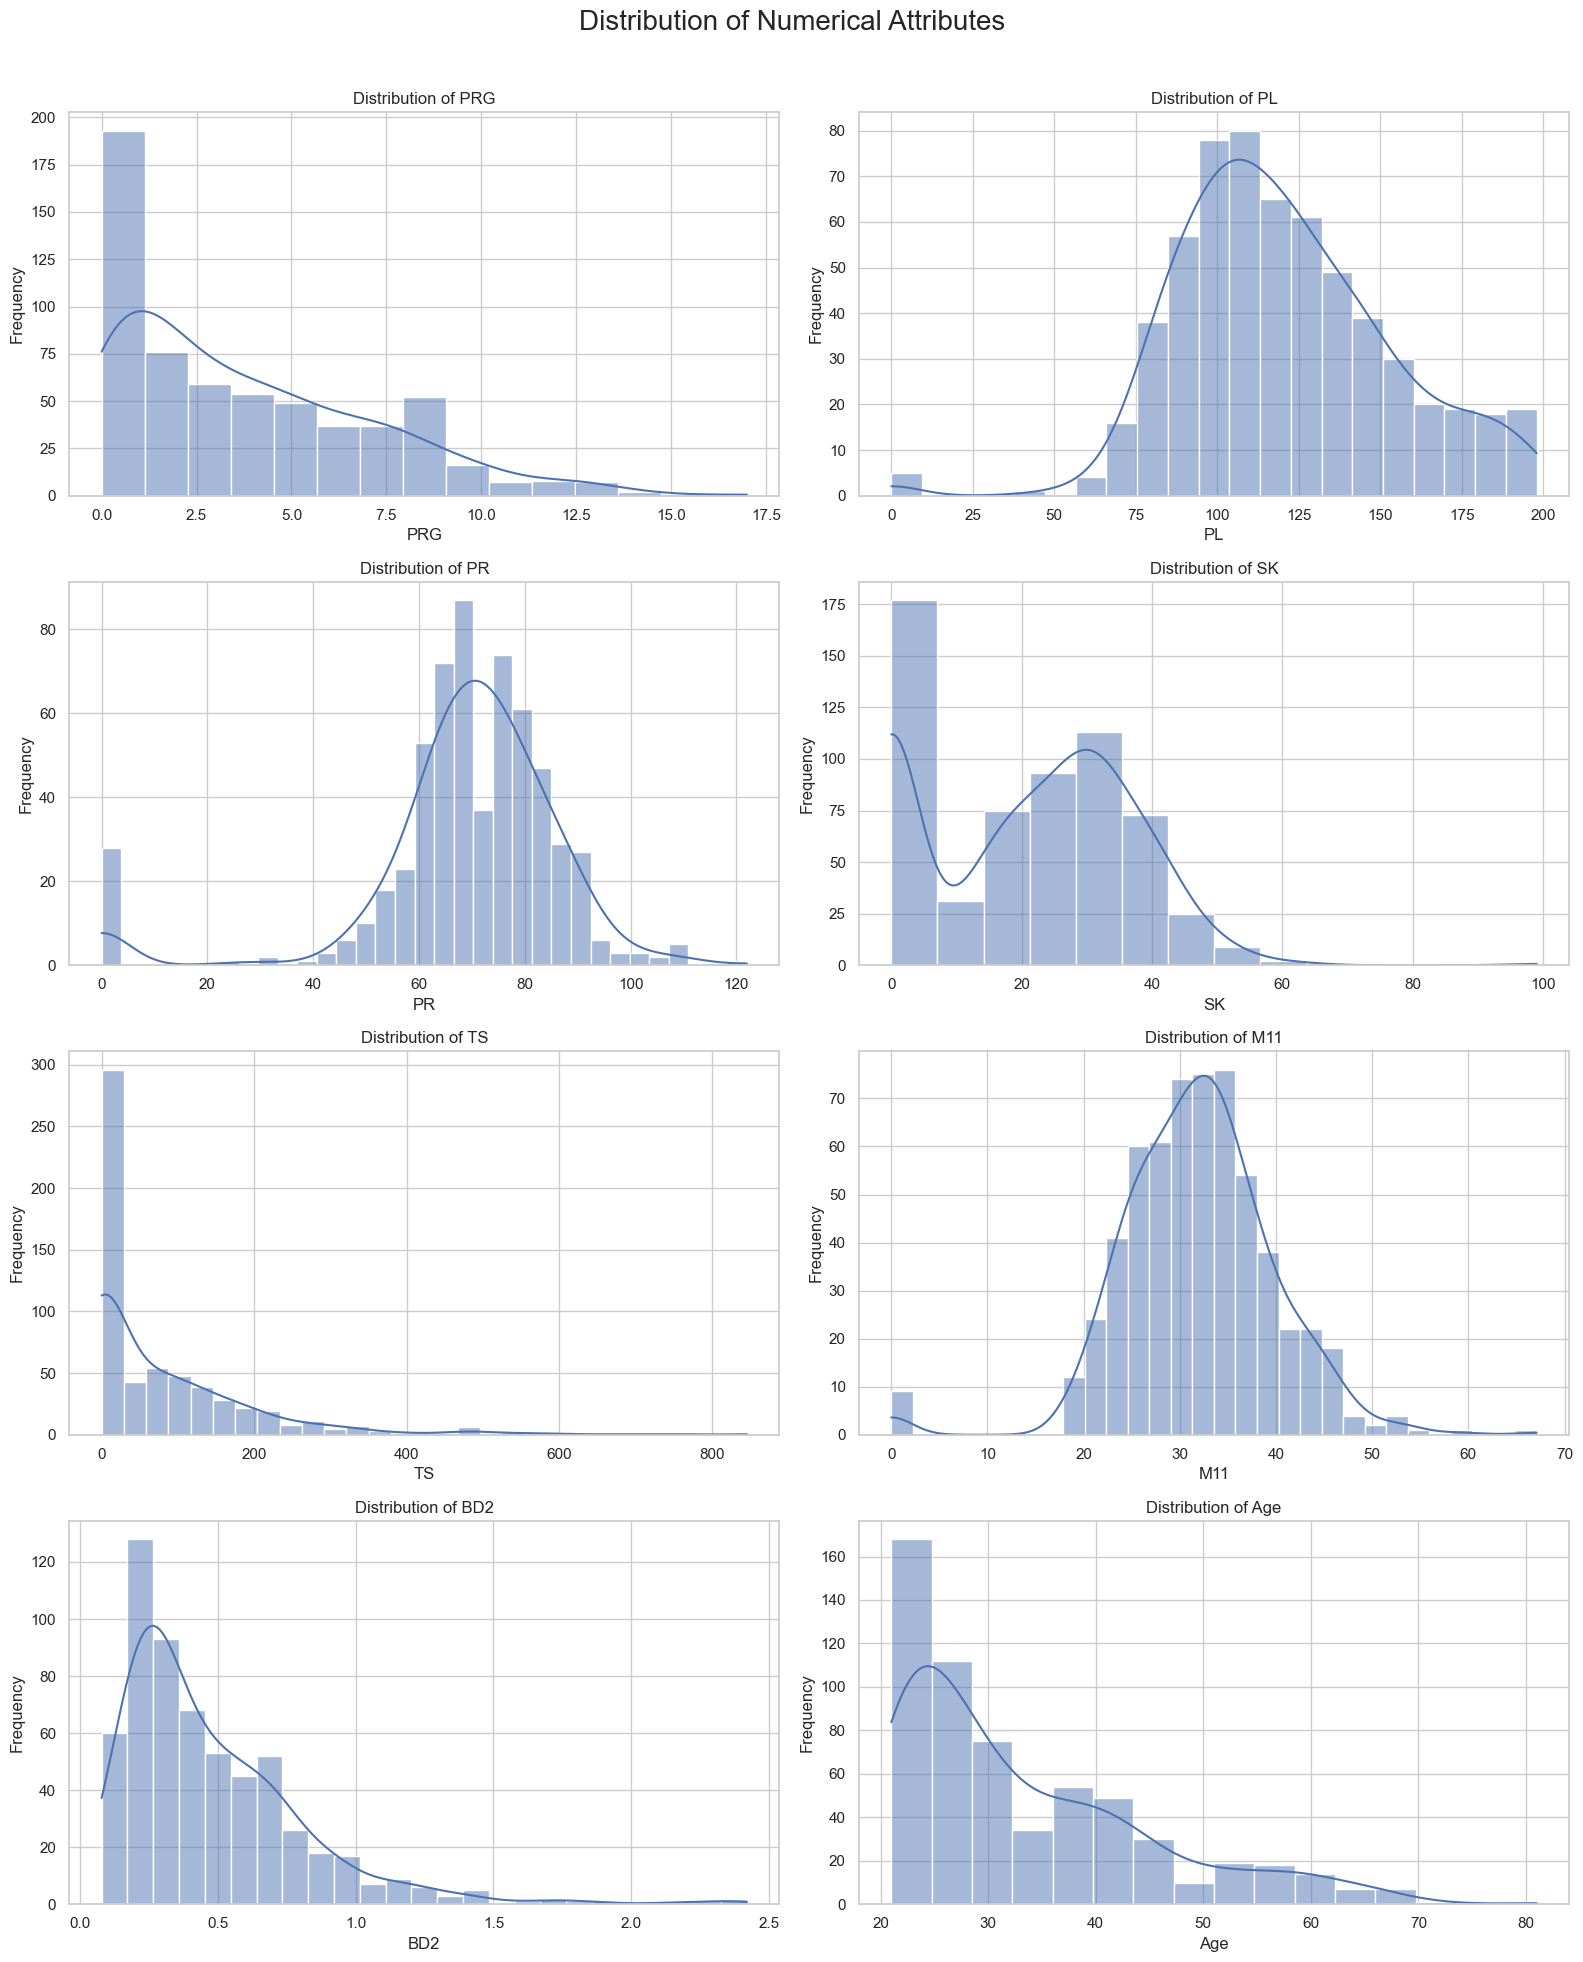

In [9]:
# Distribution of numerical attributes
numerical_columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Distribution of Numerical Attributes', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical attribute
for i, column in enumerate(numerical_columns):
    sns.histplot(train_df[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

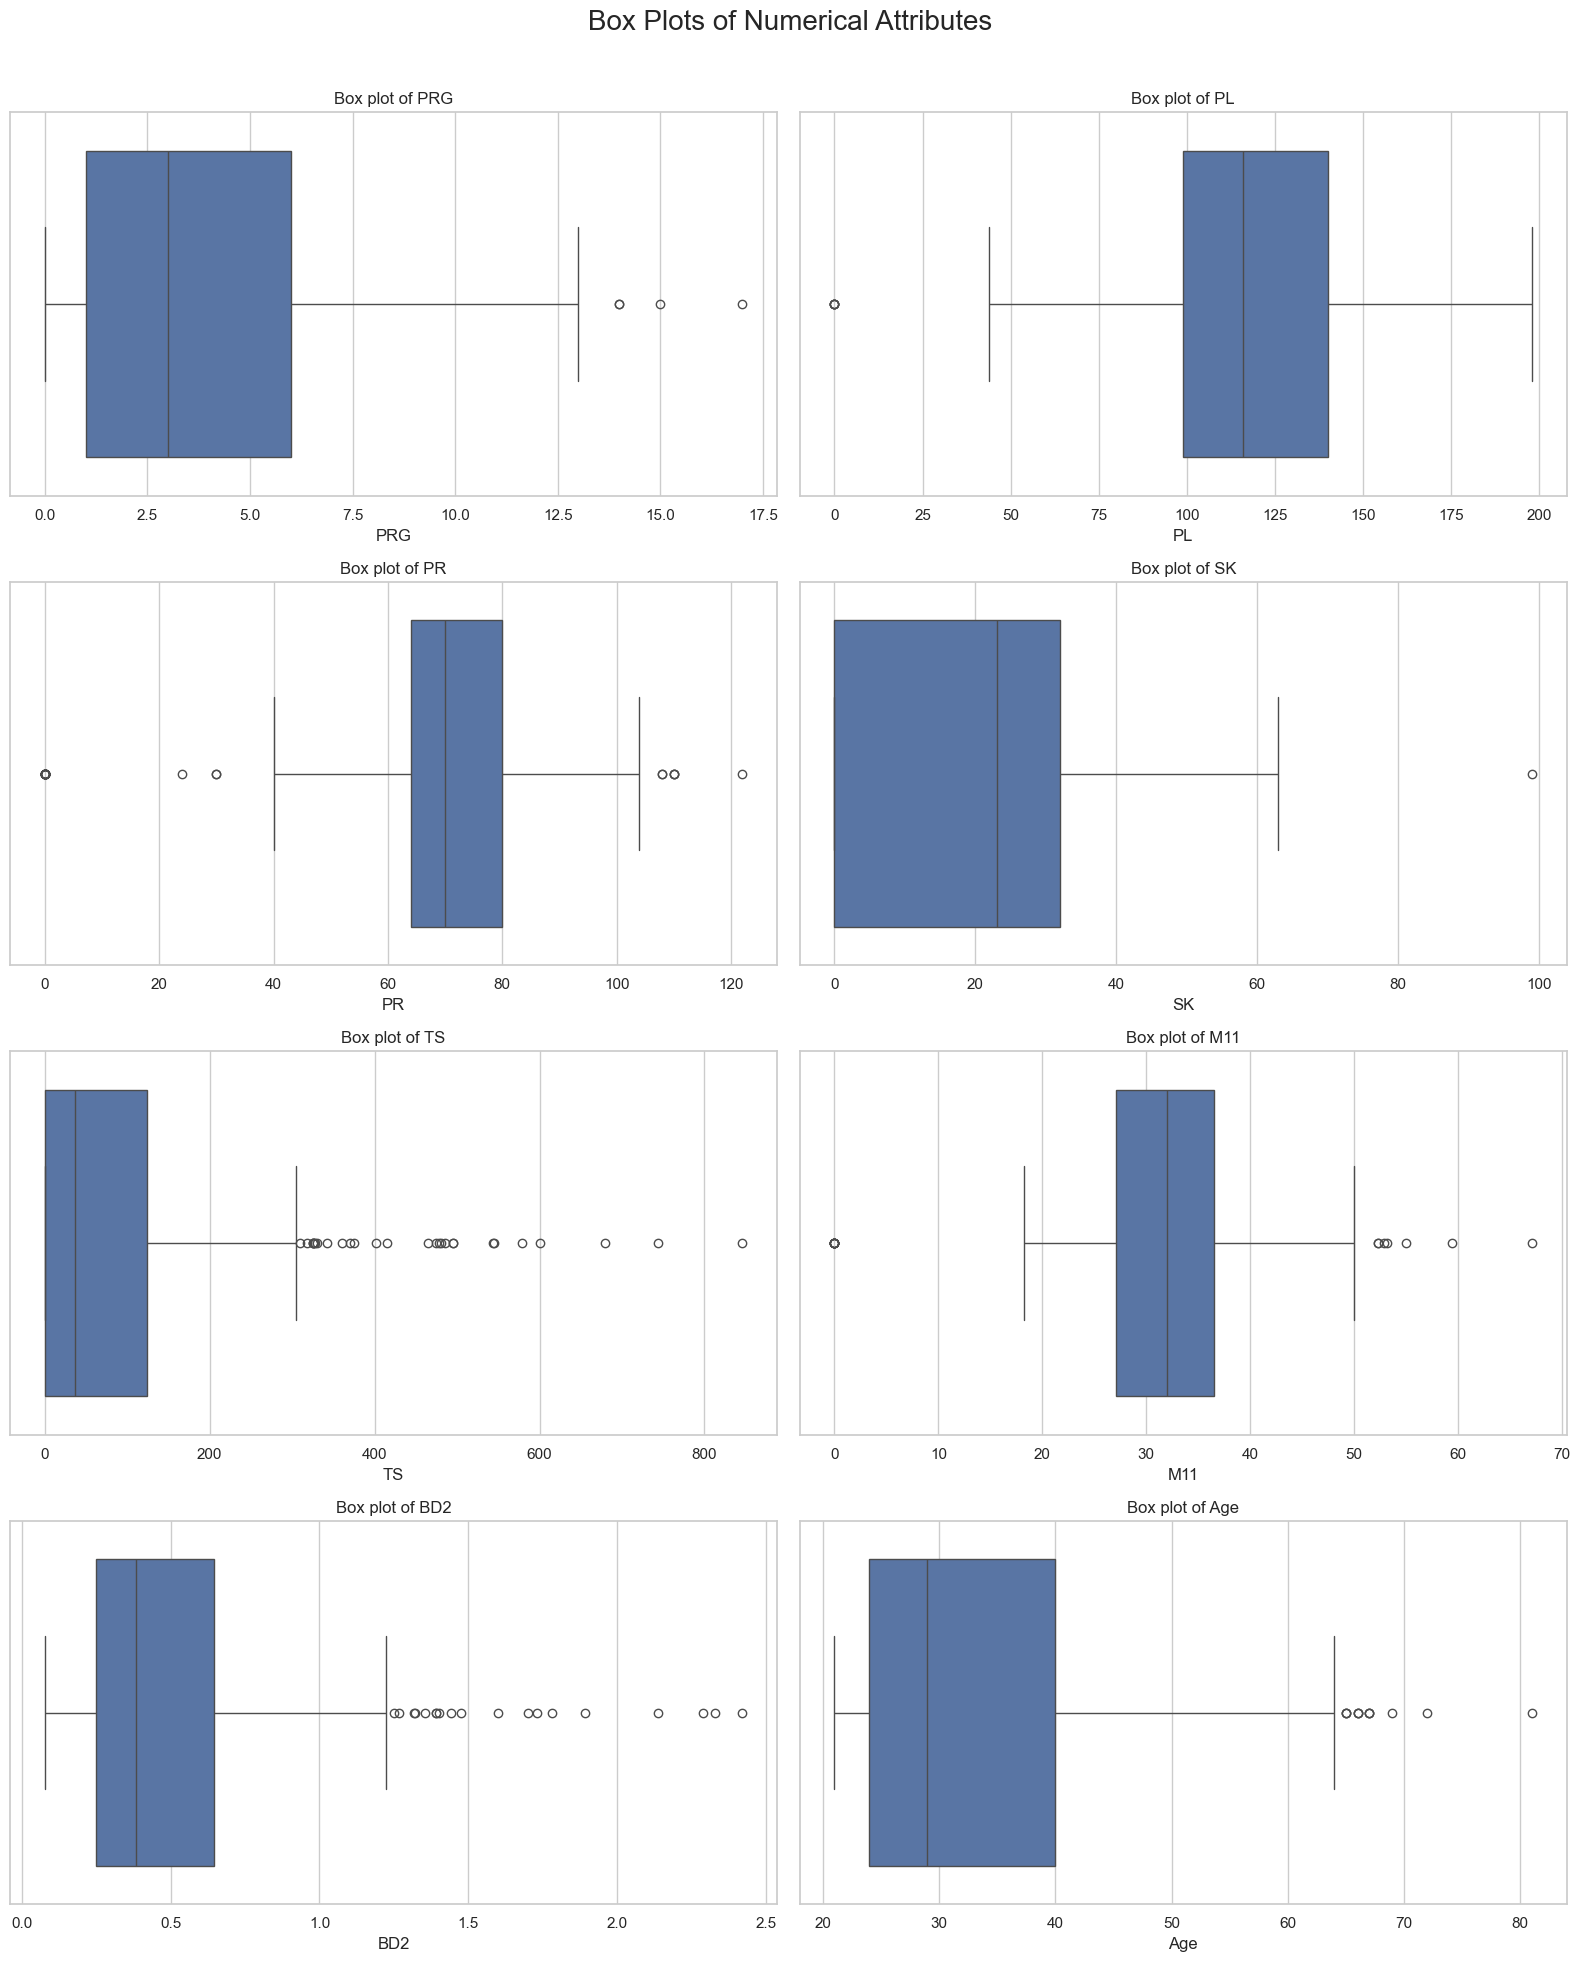

In [10]:
# Box plots to identify outliers
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Box Plots of Numerical Attributes', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical attribute
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=train_df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_xlabel(column)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

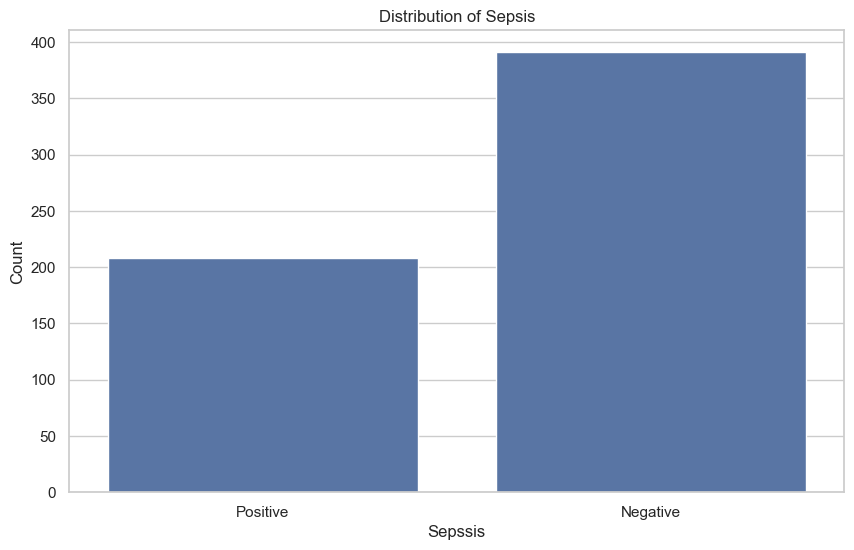

In [11]:
# Target variable analysis
# Distribution of the target variable (Sepsis)
plt.figure(figsize=(10, 6))
sns.countplot(x='Sepssis', data=train_df)
plt.title('Distribution of Sepsis')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

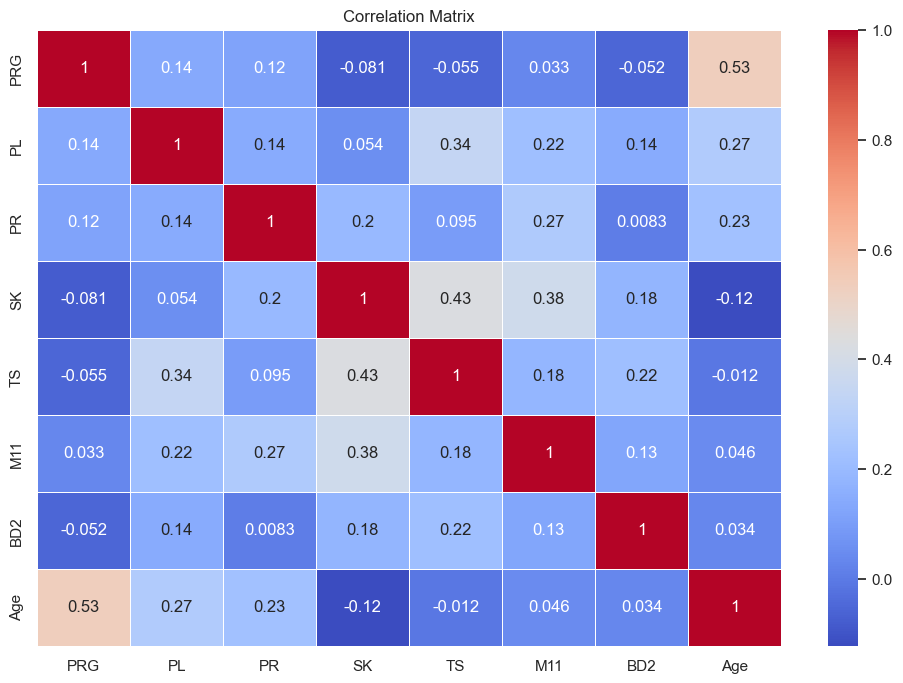

In [12]:
# Correlation matrix and heatmap
correlation_matrix = train_df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

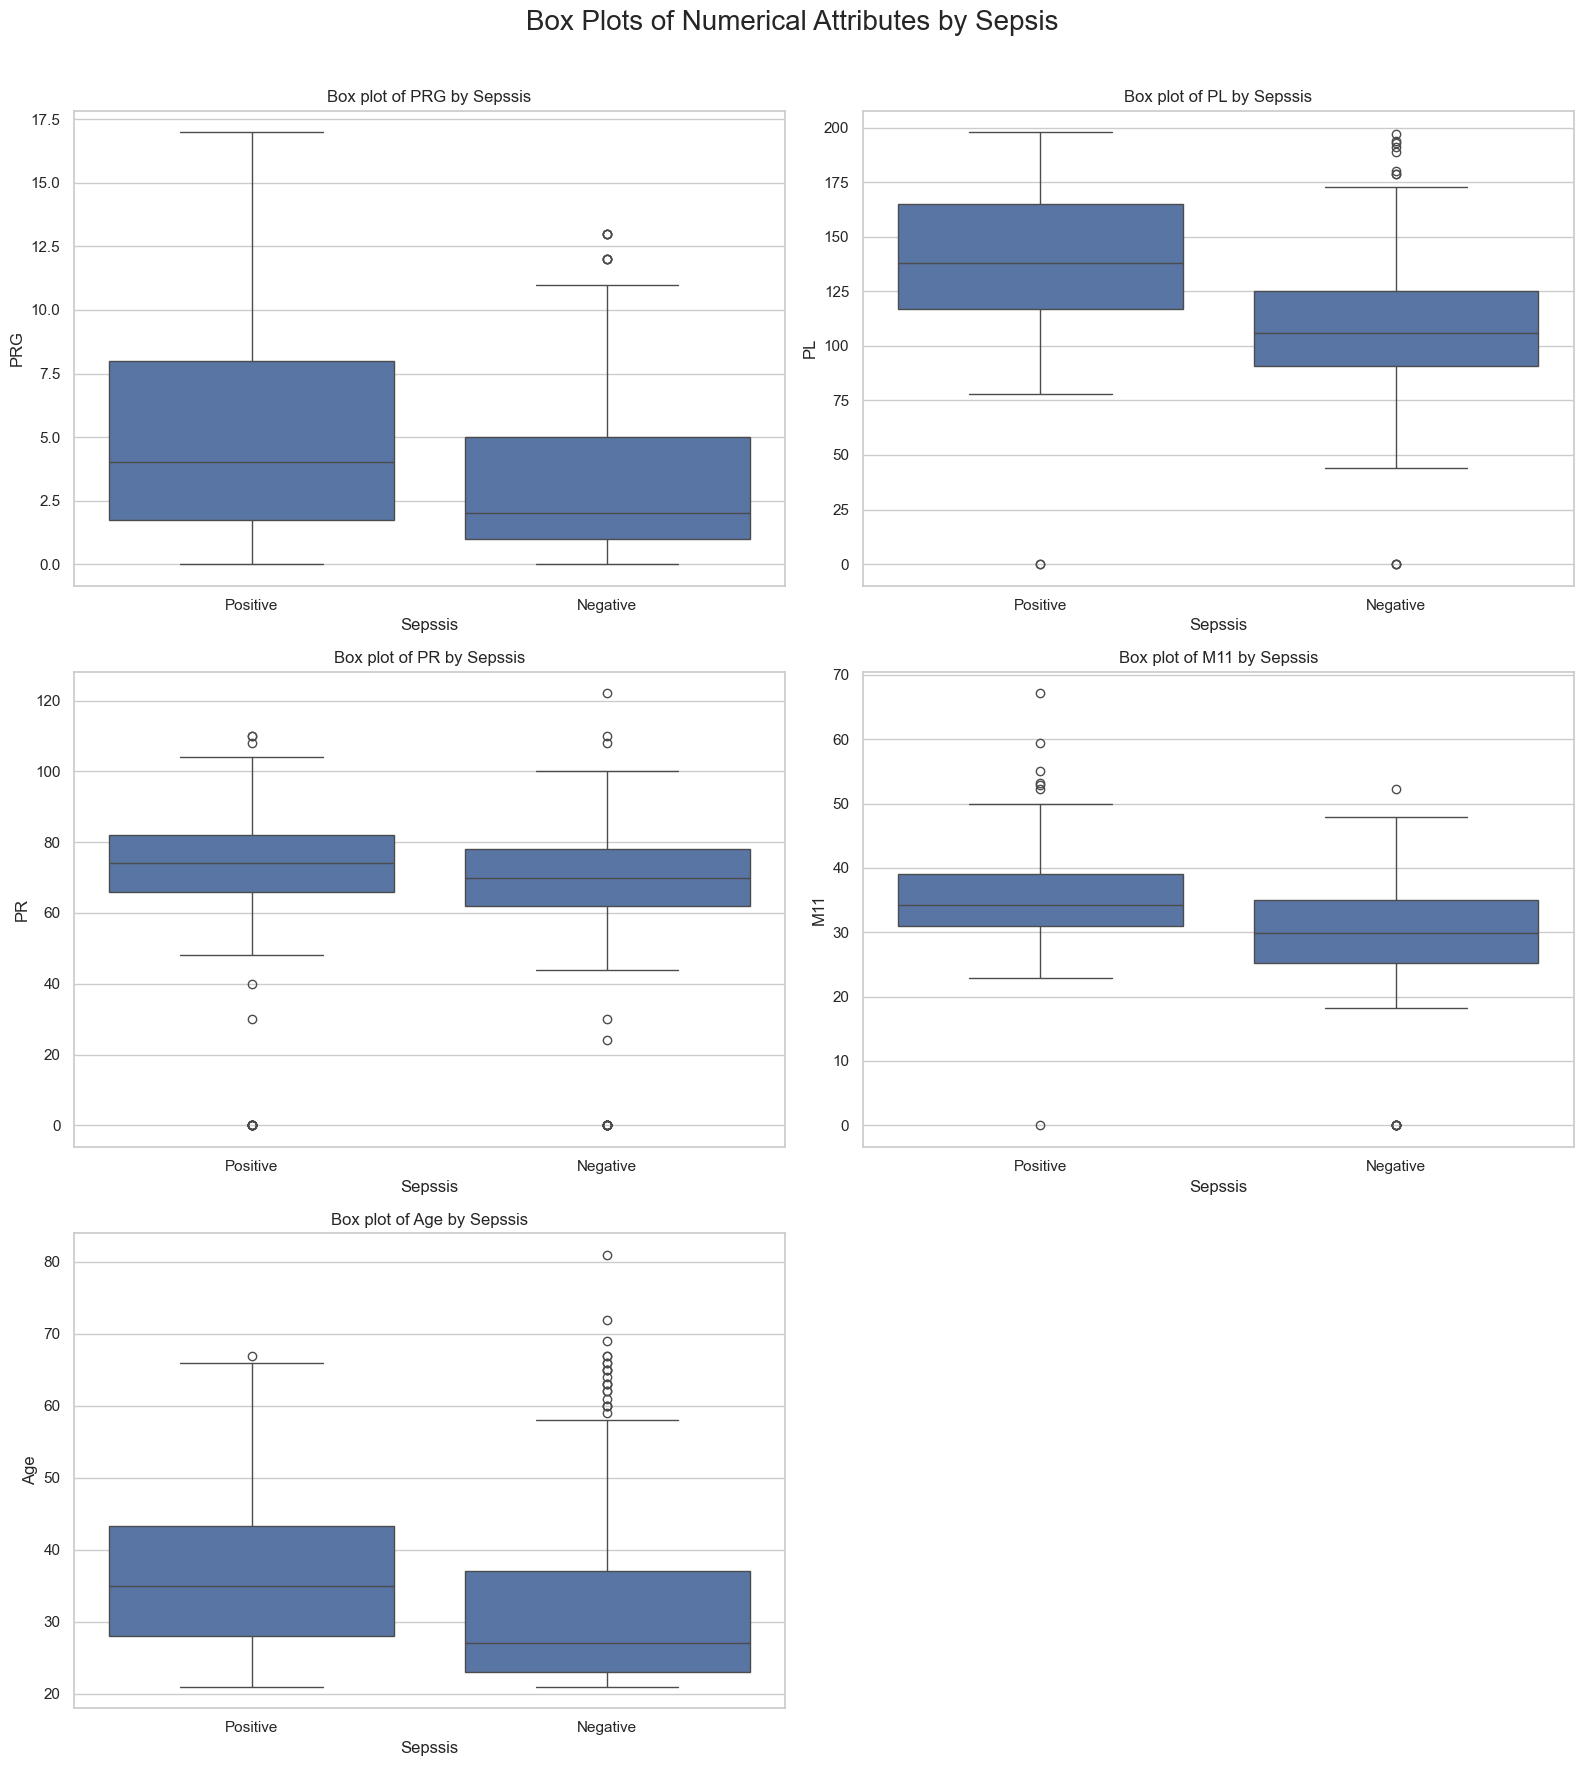

In [13]:
# List of columns for box plots
columns_by_sepsis = ['PRG', 'PL', 'PR', 'M11', 'Age']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
fig.suptitle('Box Plots of Numerical Attributes by Sepsis', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical attribute by Sepsis
for i, column in enumerate(columns_by_sepsis):
    sns.boxplot(x='Sepssis', y=column, data=train_df, ax=axes[i])
    axes[i].set_title(f'Box plot of {column} by Sepssis')
    axes[i].set_xlabel('Sepssis')
    axes[i].set_ylabel(column)

# Remove the empty subplot
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

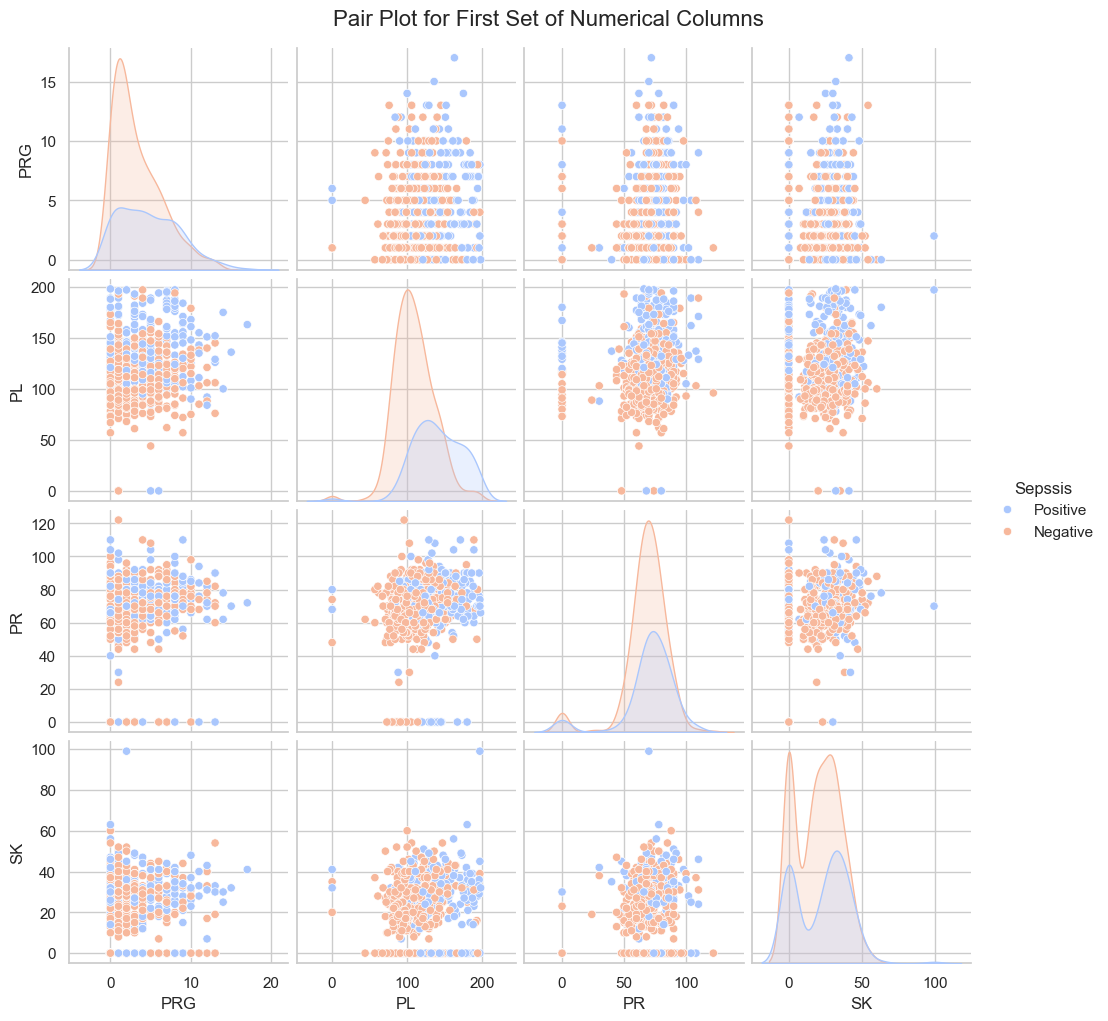

In [14]:
# First set of numerical columns
numerical_columns_set1 = ['PRG', 'PL', 'PR', 'SK']

# Pair plot for the first set
sns.pairplot(train_df[numerical_columns_set1 + ['Sepssis']], hue='Sepssis', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot for First Set of Numerical Columns', y=1.02, fontsize=16)
plt.show()


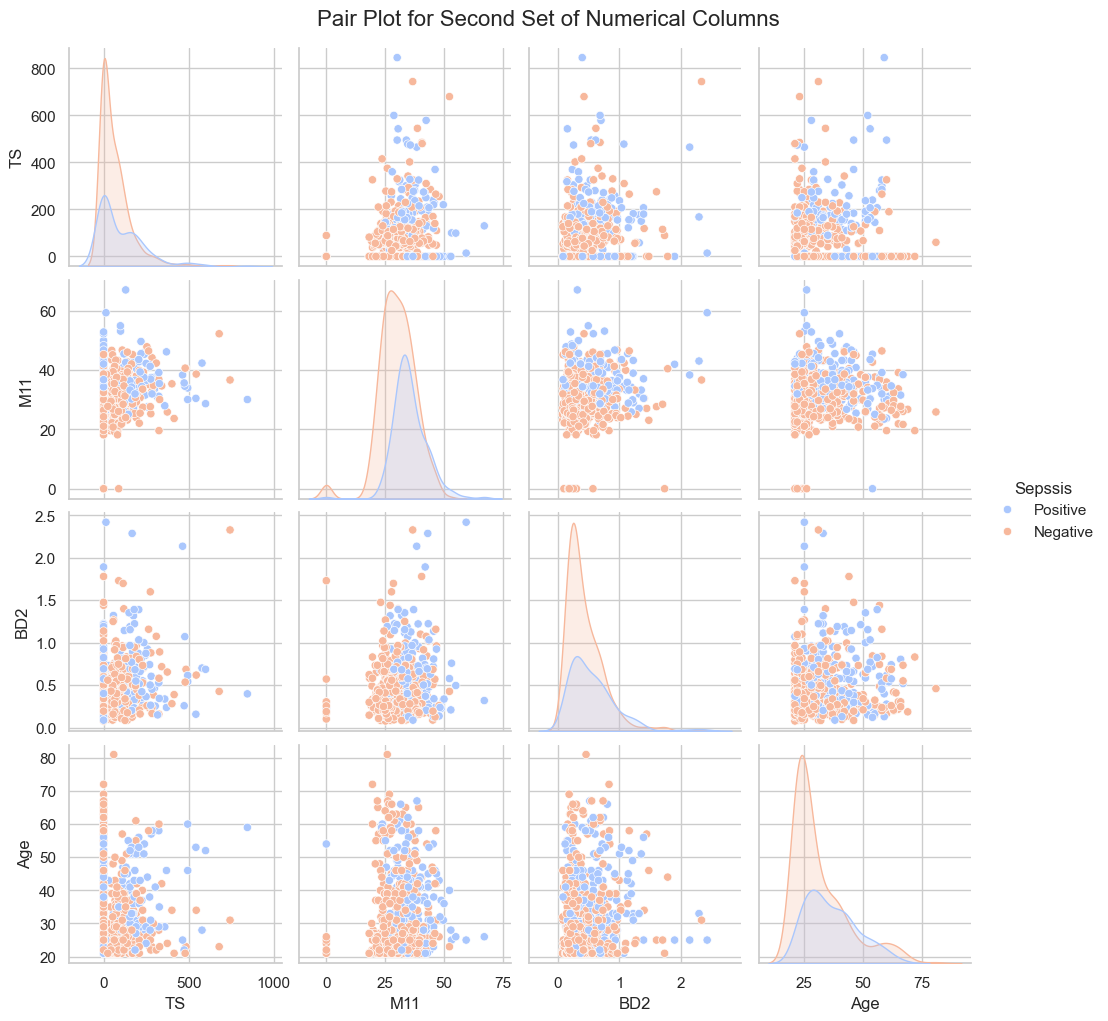

In [15]:
# Second set of numerical columns
numerical_columns_set2 = ['TS', 'M11', 'BD2', 'Age']

# Pair plot for the second set
sns.pairplot(train_df[numerical_columns_set2 + ['Sepssis']], hue='Sepssis', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot for Second Set of Numerical Columns', y=1.02, fontsize=16)
plt.show()


### Multivariate Analysis

#### PCA Analysis





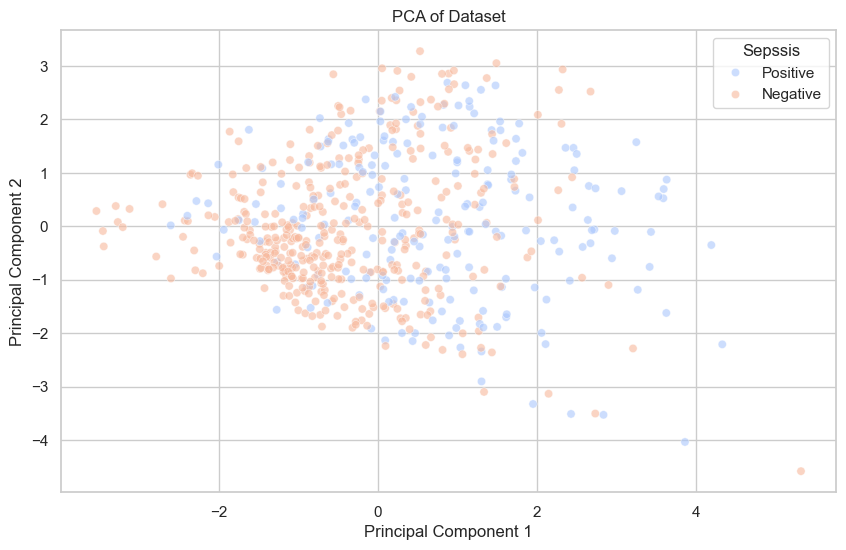

In [16]:
#make and use the copy of the dataframe
df_copy = train_df.copy()


# Define feature matrix X and target variable y
X = df_copy.drop(columns=['Sepssis', 'ID','M11','Insurance'])
y = df_copy['Sepssis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Sepssis'] = y

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Sepssis', data=pca_df, palette='coolwarm', alpha=0.6)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sepssis')
plt.show()


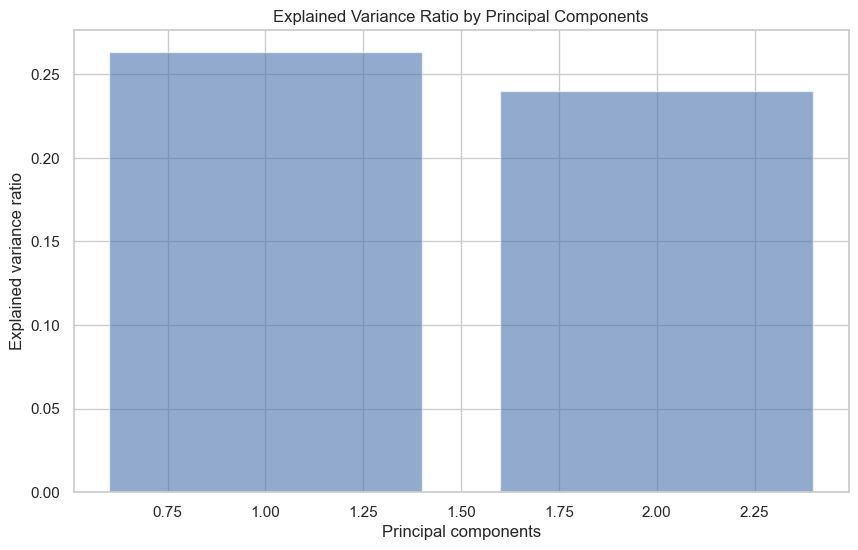

In [17]:
# Plot explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b', align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

#### 3D Scatter Plot

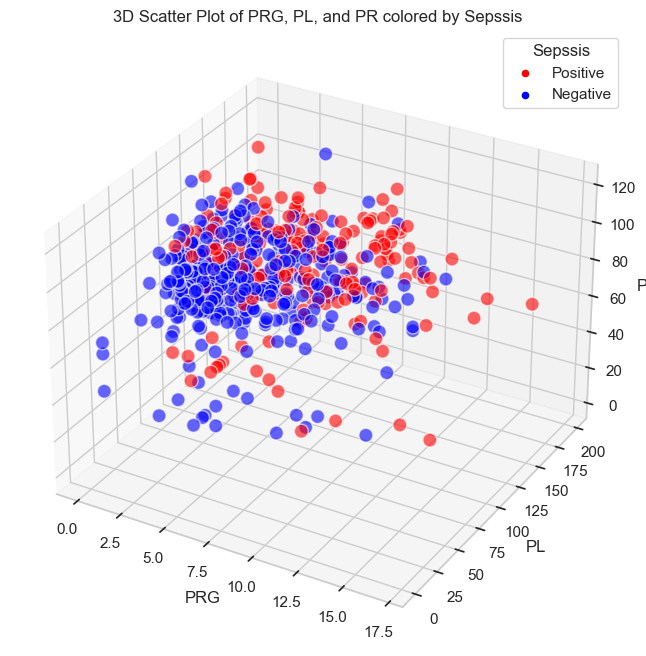

In [18]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three numerical columns and the target column
x_col = 'PRG'
y_col = 'PL'
z_col = 'PR'
target_col = 'Sepssis'

# Map target variable to colors
colors = {'Positive': 'red', 'Negative': 'blue'}
ax.scatter(train_df[x_col], train_df[y_col], train_df[z_col], c=train_df[target_col].map(colors), alpha=0.6, edgecolors='w', s=100)

# Set axis labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title(f'3D Scatter Plot of {x_col}, {y_col}, and {z_col} colored by {target_col}')

# Create a legend
for label in colors:
    ax.scatter([], [], [], color=colors[label], label=label)
ax.legend(title=target_col)

plt.show()


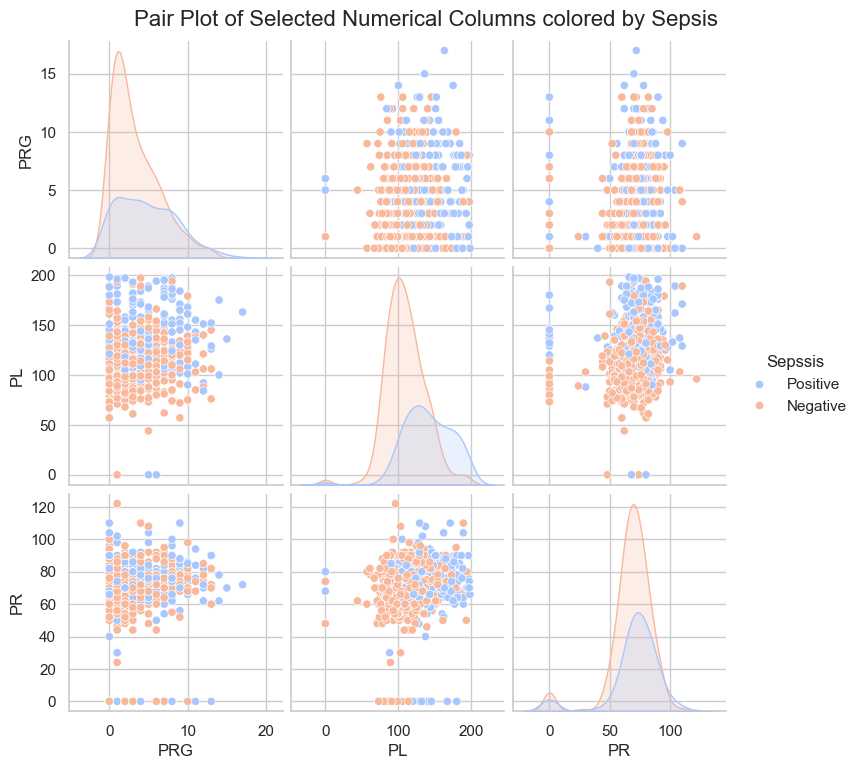

In [19]:

# Select three numerical columns and the target column
selected_columns = ['PRG', 'PL', 'PR', 'Sepssis']

# Pair plot with color coding by Sepsis
sns.pairplot(train_df[selected_columns], hue='Sepssis', palette='coolwarm', diag_kind='kde')

# Add a title
plt.suptitle('Pair Plot of Selected Numerical Columns colored by Sepsis', y=1.02, fontsize=16)
plt.show()


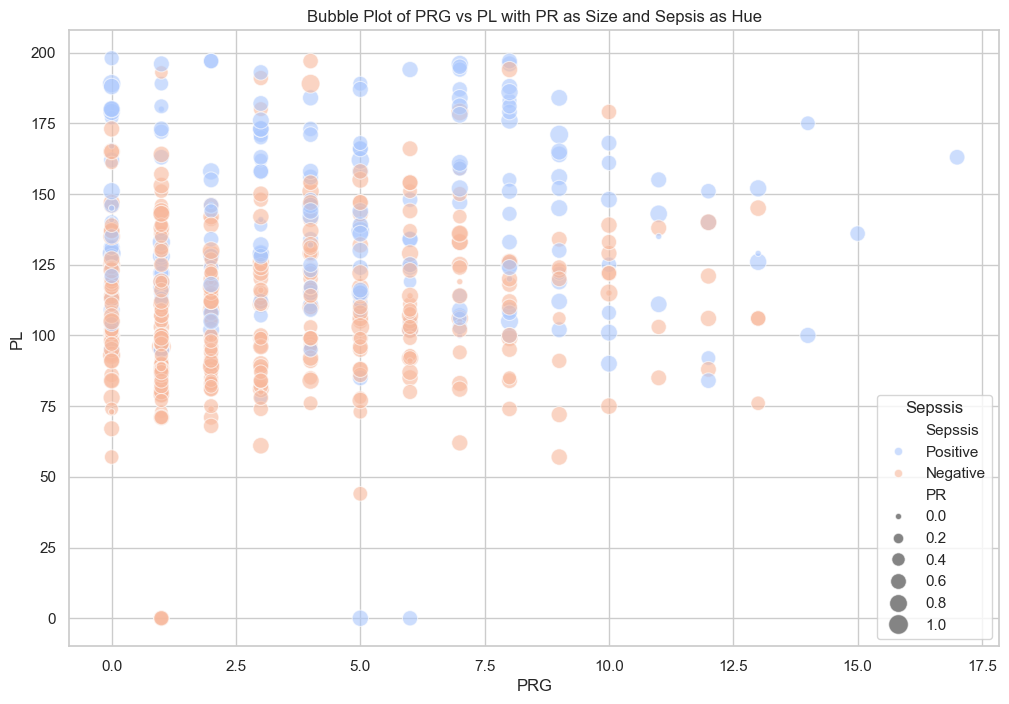

In [20]:
# Select three numerical columns
x_col = 'PRG'
y_col = 'PL'
size_col = 'PR'

# Normalize the size column for better visualization
size = (train_df[size_col] - train_df[size_col].min()) / (train_df[size_col].max() - train_df[size_col].min())

# Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_col, y=y_col, size=size, sizes=(20, 200), hue='Sepssis', data=train_df, alpha=0.6, palette='coolwarm')

# Set axis labels and title
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f'Bubble Plot of {x_col} vs {y_col} with {size_col} as Size and Sepsis as Hue')

# Show the plot
plt.legend(title='Sepssis')
plt.show()


## Data Preparation

### Handle Missing Values

In [21]:
# Check for missing values
train_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### Drop irrelevant columns

In [22]:
train_df = train_df.drop(columns=['ID', 'Insurance', 'M11'])

# Display the first few rows of the modified DataFrame to confirm the columns were dropped
train_df.head()

,PRG,PL,PR,SK,TS,BD2,Age,Sepssis
0,6,148,72,35,0,0.627,50,Positive
1,1,85,66,29,0,0.351,31,Negative
2,8,183,64,0,0,0.672,32,Positive
3,1,89,66,23,94,0.167,21,Negative
4,0,137,40,35,168,2.288,33,Positive


### Encode Categorical Variables

In [23]:
# Convert categorical columns to category dtype
train_df['Sepssis'] = train_df['Sepssis'].astype('category')

# Encode categorical columns using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sepssis'], drop_first=True)


In [24]:
train_df.head()

,PRG,PL,PR,SK,TS,BD2,Age,Sepssis_Positive
0,6,148,72,35,0,0.627,50,True
1,1,85,66,29,0,0.351,31,False
2,8,183,64,0,0,0.672,32,True
3,1,89,66,23,94,0.167,21,False
4,0,137,40,35,168,2.288,33,True


In [25]:
train_df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'BD2', 'Age', 'Sepssis_Positive'], dtype='object')

### Normalize Numerical Variables

In [26]:
# Select numerical columns
numerical_columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'BD2', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the numerical columns
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
train_df.head()


,PRG,PL,PR,SK,TS,BD2,Age,Sepssis_Positive
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.432333,1.413836,True
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.386002,-0.193804,False
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,0.565757,-0.109191,True
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.931558,-1.039930,False
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,5.357163,-0.024579,True


### Split the Data into Training and Testing Sets

In [27]:
# Define the features (X) and the target (y)
X = train_df.drop(columns=['Sepssis_Positive'])
y = train_df['Sepssis_Positive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')


Training set shape: X_train: (479, 7), y_train: (479,)
Testing set shape: X_test: (120, 7), y_test: (120,)


## Modelling

In [28]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create pipelines
pipelines = {name: Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model)
]) for name, model in models.items()}

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store evaluation metrics
model_names = []
accuracies = []
conf_matrices = []
class_reports = []
roc_aucs = []
roc_curves = {}

# Train the models and evaluate them
for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Store evaluation metrics
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred).ravel())  # Flatten the confusion matrix
    class_reports.append(classification_report(y_test, y_pred, output_dict=True))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_aucs.append(roc_auc)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_curves[name] = (fpr, tpr)
    
    print(f'{name} trained and evaluated.')



Logistic Regression trained and evaluated.
Decision Tree trained and evaluated.
Random Forest trained and evaluated.
SVM trained and evaluated.
KNN trained and evaluated.
Gradient Boosting trained and evaluated.


In [30]:
# Create DataFrames for comparison
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
conf_matrix_df = pd.DataFrame(conf_matrices, index=model_names, columns=['TN', 'FP', 'FN', 'TP'])
class_report_df = pd.concat([pd.DataFrame(report).T for report in class_reports], keys=model_names)
roc_auc_df = pd.DataFrame({'Model': model_names, 'ROC AUC': roc_aucs})

In [31]:
# Print evaluation results
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.733333
1,Decision Tree,0.750000
2,Random Forest,0.708333
3,SVM,0.691667
4,KNN,0.666667
5,Gradient Boosting,0.750000


In [32]:
conf_matrix_df

,TN,FP,FN,TP
Logistic Regression,62,15,17,26
Decision Tree,66,11,19,24
Random Forest,63,14,21,22
SVM,61,16,21,22
KNN,59,18,22,21
Gradient Boosting,66,11,19,24


In [33]:
class_report_df

precision    recall  f1-score     support
Logistic Regression False          0.784810  0.805195  0.794872   77.000000
                    True           0.634146  0.604651  0.619048   43.000000
                    accuracy       0.733333  0.733333  0.733333    0.733333
                    macro avg      0.709478  0.704923  0.706960  120.000000
                    weighted avg   0.730822  0.733333  0.731868  120.000000
Decision Tree       False          0.776471  0.857143  0.814815   77.000000
                    True           0.685714  0.558140  0.615385   43.000000
                    accuracy       0.750000  0.750000  0.750000    0.750000
                    macro avg      0.731092  0.707641  0.715100  120.000000
                    weighted avg   0.743950  0.750000  0.743352  120.000000
Random Forest       False          0.750000  0.818182  0.782609   77.000000
                    True           0.611111  0.511628  0.556962   43.000000
                    accuracy       0.708333  0.708333  0.708333    0.708333
                    macro avg      0.680556  0.664905  0.669785  120.000000
                    weighted avg   0.700231  0.708333  0.701752  120.000000
SVM                 False          0.743902  0.792208  0.767296   77.000000
                    True           0.578947  0.511628  0.543210   43.000000
                    accuracy       0.691667  0.691667  0.691667    0.691667
                    macro avg      0.661425  0.651918  0.655253  120.000000
                    weighted avg   0.684794  0.691667  0.686998  120.000000
KNN                 False          0.728395  0.766234  0.746835   77.000000
                    True           0.538462  0.488372  0.512195   43.000000
                    accuracy       0.666667  0.666667  0.666667    0.666667
                    macro avg      0.633428  0.627303  0.629515  120.000000
                    weighted avg   0.660336  0.666667  0.662756  120.000000
Gradient Boosting   False          0.776471  0.857143  0.814815   77.000000
                    True           0.685714  0.558140  0.615385   43.000000
                    accuracy       0.750000  0.750000  0.750000    0.750000
                    macro avg      0.731092  0.707641  0.715100  120.000000
                    weighted avg   0.743950  0.750000  0.743352  120.000000

In [34]:
roc_auc_df

,Model,ROC AUC
0,Logistic Regression,0.769254
1,Decision Tree,0.707641
2,Random Forest,0.755663
3,SVM,0.755965
4,KNN,0.671398
5,Gradient Boosting,0.774388


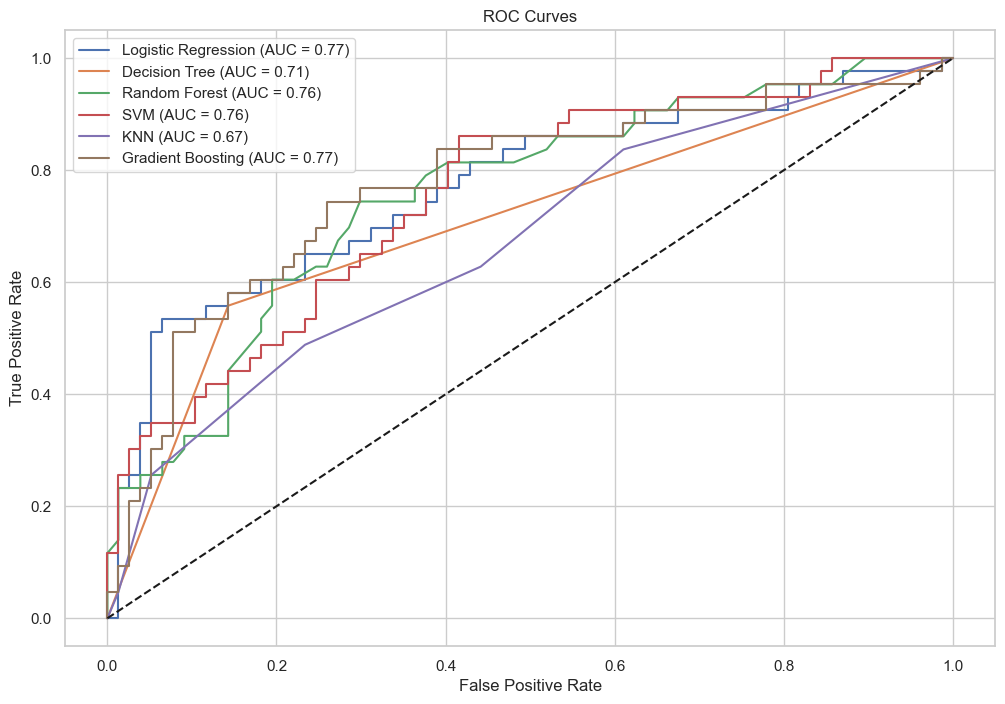

In [35]:
# Plot ROC Curves
plt.figure(figsize=(12, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_df[roc_auc_df["Model"] == name]["ROC AUC"].values[0]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [36]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 10]
    }
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Perform GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    print(f"Performing GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {name}: {grid_search.best_score_}")



Performing GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best ROC AUC for Logistic Regression: 0.8038402457757297
Performing GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best ROC AUC for Decision Tree: 0.7724580676193579
Performing GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best ROC AUC for Random Forest: 0.818194231097457
Performing GridSearchCV for SVM...
Best parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best ROC AUC for SVM: 0.8178047758692921
Performing GridSearchCV for KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best ROC AUC for KNN: 0.7844124811866747
Performing GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_r

In [37]:
# Evaluate the best models on the test set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'{name} ROC AUC: {roc_auc:.4f}')

# Save the best models using joblib
# import joblib
# for name, model in best_estimators.items():
#     joblib.dump(model, f'{name}_best_model.pkl')


Logistic Regression ROC AUC: 0.7708
Decision Tree ROC AUC: 0.7806
Random Forest ROC AUC: 0.7777
SVM ROC AUC: 0.7608
KNN ROC AUC: 0.6750
Gradient Boosting ROC AUC: 0.7952


#### further hyperparameter tuning

In [38]:
from imblearn.over_sampling import SMOTE

# Convert labels to numerical values
label_mapping = {'Negative': 0, 'Positive': 1}
df_copy['Sepssis'] = df_copy['Sepssis'].map(label_mapping)

# Define features and target again
X = df_copy.drop(['Sepssis', 'ID', 'M11','Insurance'], axis=1)
y = df_copy['Sepssis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_poly, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [39]:

# Define the parameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'XGB': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'LGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 41, 51]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGB': XGBClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42)
}




In [40]:
# Perform RandomizedSearchCV for each model
best_models = {}
for name, model in models.items():
    print(f"Performing RandomizedSearchCV for {name}...")
    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], 
                                     n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {name}: {grid_search.best_score_}")


Performing RandomizedSearchCV for RandomForest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for RandomForest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best ROC AUC for RandomForest: 0.8658849097030915
Performing RandomizedSearchCV for SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 10}
Best ROC AUC for SVM: 0.839843893480257
Performing RandomizedSearchCV for XGB...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGB: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Best ROC AUC for XGB: 0.8396008570554025
Performing RandomizedSearchCV for LGBM...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 275, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

In [41]:
# output for RandomForest
print(f"Best Random Forest model: {best_models['RandomForest']}")

Best Random Forest model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=300,
                       random_state=42)


In [42]:
# output for RandomForest
print(f"Best SVM model: {best_models['SVM']}")

Best SVM model: SVC(C=10, gamma=1, probability=True, random_state=42)


In [43]:
# output for RandomForest
print(f"Best LGBM model: {best_models['LGBM']}")

Best LGBM model: LGBMClassifier(learning_rate=0.2, n_estimators=200, random_state=42)


In [44]:
# output for RandomForest
print(f"Best XGB model: {best_models['XGB']}")

Best XGB model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [45]:
best_models

{'RandomForest': RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=300,
                        random_state=42),
 'SVM': SVC(C=10, gamma=1, probability=True, random_state=42),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...),
 'LGBM': LGBMClassifier(learning_rat

In [46]:
# Evaluate models on the test set
model_evaluations = {}
for name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    model_evaluations[name] = roc_auc
    print(f'{name} ROC AUC: {roc_auc}')

RandomForest ROC AUC: 0.8948855404230658
SVM ROC AUC: 0.868009272674587
XGB ROC AUC: 0.8772095044914519
LGBM ROC AUC: 0.8930020283975659


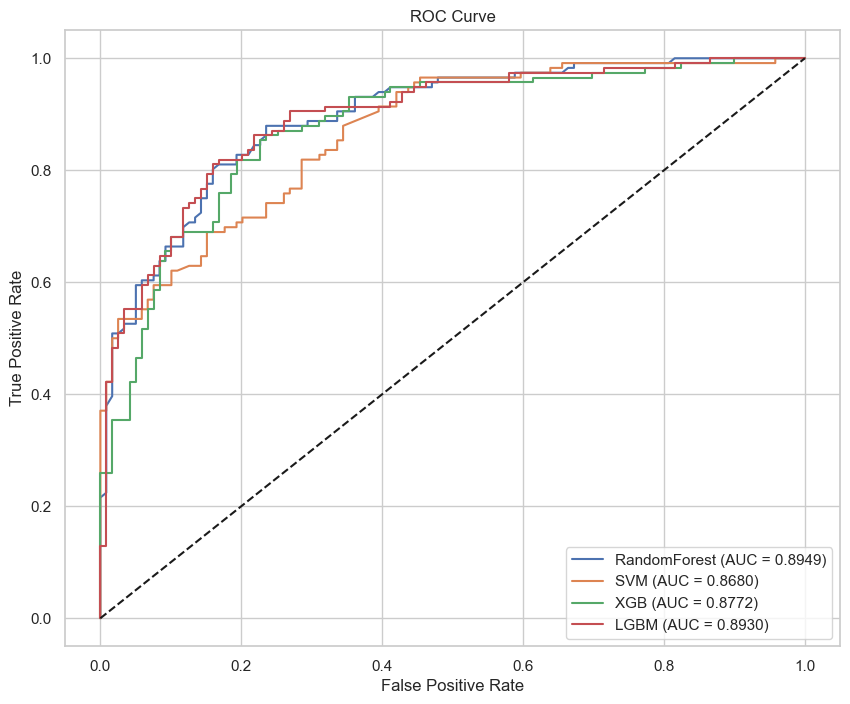

In [47]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {model_evaluations[name]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [48]:
import os

# Ensure the exports directory exists
exports_dir = '../exports'
if not os.path.exists(exports_dir):
    os.makedirs(exports_dir)

# Save the top 3 models
top_models = sorted(model_evaluations, key=model_evaluations.get, reverse=True)[:3]
for model_name in top_models:
    joblib.dump(best_models[model_name], os.path.join(exports_dir, f'{model_name}.joblib'))

print(f"Top 3 models saved in the '{exports_dir}' directory.")

Top 3 models saved in the '../exports' directory.


In [50]:
# Define the parameter grids for RandomizedSearchCV
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [100, 200, 300, 400, 500],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__bootstrap': [True, False]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [1, 0.1, 0.01, 0.001],
        'classifier__kernel': ['rbf', 'poly', 'sigmoid']
    },
    'XGB': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5]
    },
    'LGBM': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__num_leaves': [31, 41, 51]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGB': XGBClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42)
}

# Create pipelines with RandomizedSearchCV
best_models = {}
for name, model in models.items():
    print(f"Performing RandomizedSearchCV for {name}...")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grids[name], 
                                     n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {name}: {grid_search.best_score_}")

# Evaluate models on the test set
model_evaluations = {}
for name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    model_evaluations[name] = roc_auc
    print(f'{name} ROC AUC: {roc_auc}')

# Save the top 3 models
# Ensure the exports directory exists
exports_dir = '../exports'
if not os.path.exists(exports_dir):
    os.makedirs(exports_dir)

# Save the top 3 models
top_models = sorted(model_evaluations, key=model_evaluations.get, reverse=True)[:3]
for model_name in top_models:
    joblib.dump(best_models[model_name], os.path.join(exports_dir, f'{model_name}.joblib'))

print(f"Top 3 models saved in the '{exports_dir}' directory.")


Performing RandomizedSearchCV for RandomForest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for RandomForest: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20, 'classifier__bootstrap': False}
Best ROC AUC for RandomForest: 0.8657808386899296
Performing RandomizedSearchCV for SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVM: {'classifier__kernel': 'rbf', 'classifier__gamma': 1, 'classifier__C': 10}
Best ROC AUC for SVM: 0.834250382614019
Performing RandomizedSearchCV for XGB...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGB: {'classifier__n_estimators': 200, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.1}
Best ROC AUC for XGB: 0.8396008570554025
Performing RandomizedSearchCV for LGBM...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number 

In [53]:
# Fit the encoder on the Sepsis column
encoder = LabelEncoder()
df_copy['Sepssis'] = encoder.fit_transform(df_copy['Sepssis'])

# Save the encoder
joblib.dump(encoder, '../exports/encoder.joblib')


['../exports/encoder.joblib']

## Deployment

Deployment will be done using streamlit and fast api